In [1]:
!pip install huggingface_hub

In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [6]:
import numpy as np

# Load jina-embeddings-v4

In [3]:
# !pip install transformers>=4.52.0 torch>=2.6.0 peft>=0.15.2 torchvision pillow
from transformers import AutoModel
# Initialize the model
model = AutoModel.from_pretrained("jinaai/jina-embeddings-v4", trust_remote_code=True)

model.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

configuration_jina_embeddings_v4.py:   0%|          | 0.00/750 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- configuration_jina_embeddings_v4.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_jina_embeddings_v4.py: 0.00B [00:00, ?B/s]

custom_lora_module.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- custom_lora_module.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen2_5_vl.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- qwen2_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- modeling_jina_embeddings_v4.py
- custom_lora_module.py
- qwen2_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.51G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/360M [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

PeftModelForFeatureExtraction(
  (base_model): LoraModel(
    (model): JinaEmbeddingsV4Model(
      (model): Qwen2_5_VLModel(
        (visual): Qwen2_5_VisionTransformerPretrainedModel(
          (patch_embed): Qwen2_5_VisionPatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-31): 32 x Qwen2_5_VLVisionBlock(
              (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
              (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
              (attn): Qwen2_5_VLVisionSdpaAttention(
                (qkv): Linear(in_features=1280, out_features=3840, bias=True)
                (proj): Linear(in_features=1280, out_features=1280, bias=True)
              )
              (mlp): Qwen2_5_VLMLP(
                (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
                (up_proj): Linear(in_features=1280, out_feat

In [4]:
def verify_caption_image_alignment(model, captions, images, image_embeddings=None):
    """
    Verify that generated captions are semantically aligned with their corresponding images.

    Args:
        model: The jina-embeddings-v4 model instance
        captions: List of 3 captions corresponding to the 3 images
        images: List of 3 image URLs/paths
        image_embeddings: Optional pre-computed image embeddings

    Returns:
        dict: Detailed alignment analysis results
    """
    import numpy as np

    assert len(captions) == len(images) == 3, "Must provide exactly 3 captions and 3 images"

    print("Generating embeddings for caption-image alignment verification...")

    # Generate caption embeddings
    caption_embeddings = model.encode_text(
        texts=captions,
        task="retrieval",
        return_numpy=True
    )

    # Generate image embeddings if not provided
    if image_embeddings is None:
        image_embeddings = model.encode_image(
            images=images,
            task="retrieval",
            return_numpy=True
        )

    # Cosine similarity function
    def cosine_similarity(a, b):
        a = np.array(a)
        b = np.array(b)
        return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))

    # Calculate full similarity matrix (captions vs images)
    similarity_matrix = cosine_similarity(caption_embeddings, image_embeddings)

    # Results structure
    results = {
        'captions': captions,
        'images': images,
        'similarity_matrix': similarity_matrix,
        'alignment_scores': [],
        'correct_alignments': 0,
        'average_correct_similarity': 0.0,
        'cross_similarities': []
    }

    # Check alignment for each caption-image pair
    for i in range(3):
        correct_similarity = similarity_matrix[i][i]  # Caption i with Image i

        # Find best matching image for this caption
        best_match_idx = np.argmax(similarity_matrix[i])
        is_correctly_aligned = (best_match_idx == i)

        alignment_info = {
            'caption_index': i,
            'caption': captions[i],
            'image_url': images[i],
            'correct_similarity': float(correct_similarity),
            'best_match_index': int(best_match_idx),
            'best_match_similarity': float(similarity_matrix[i][best_match_idx]),
            'is_correctly_aligned': is_correctly_aligned,
            'similarity_rank': int(np.argsort(similarity_matrix[i])[::-1].tolist().index(i) + 1)
        }

        results['alignment_scores'].append(alignment_info)

        if is_correctly_aligned:
            results['correct_alignments'] += 1

    # Calculate average similarity for correct pairs
    correct_similarities = [score['correct_similarity'] for score in results['alignment_scores']]
    results['average_correct_similarity'] = float(np.mean(correct_similarities))

    # Store cross-similarities (wrong pairings)
    for i in range(3):
        for j in range(3):
            if i != j:
                results['cross_similarities'].append({
                    'caption_index': i,
                    'image_index': j,
                    'similarity': float(similarity_matrix[i][j])
                })

    return results

def display_alignment_analysis(results):
    """
    Display caption-image alignment analysis in a comprehensive format.
    """
    print("="*70)
    print("CAPTION-IMAGE ALIGNMENT ANALYSIS")
    print("="*70)

    # Overall statistics
    print(f"\nOVERALL ALIGNMENT STATISTICS:")
    print(f"Correctly aligned pairs: {results['correct_alignments']}/3")
    print(f"Average similarity for correct pairs: {results['average_correct_similarity']:.4f}")
    print(f"Alignment accuracy: {results['correct_alignments']/3*100:.1f}%")

    # Detailed per-image analysis
    print(f"\nDETAILED ALIGNMENT ANALYSIS:")
    print("-" * 50)

    for i, score in enumerate(results['alignment_scores']):
        status = "✓ ALIGNED" if score['is_correctly_aligned'] else "✗ MISALIGNED"
        print(f"\nCaption {i+1}: {score['caption']}")
        print(f"Image {i+1}: {score['image_url']}")
        print(f"Correct pair similarity: {score['correct_similarity']:.4f}")
        print(f"Best match: Image {score['best_match_index']+1} (similarity: {score['best_match_similarity']:.4f})")
        print(f"Similarity rank: {score['similarity_rank']}/3")
        print(f"Status: {status}")

    # Similarity matrix
    print(f"\nFULL SIMILARITY MATRIX:")
    print("-" * 30)
    print("Rows: Captions | Columns: Images")
    matrix = results['similarity_matrix']

    print(f"{'':>12} {'Image1':>8} {'Image2':>8} {'Image3':>8}")
    for i in range(3):
        row_str = f"Caption{i+1:>2}:"
        for j in range(3):
            marker = "*" if i == j else " "
            row_str += f"{matrix[i][j]:>7.3f}{marker}"
        print(row_str)

    print("\n* = Correct caption-image pairs")

def analyze_embedding_space_clustering(results):
    """
    Analyze how well captions and images cluster in embedding space.
    """
    print(f"\nEMBEDDING SPACE CLUSTERING ANALYSIS:")
    print("-" * 40)

    matrix = results['similarity_matrix']

    # Check if each caption is closest to its corresponding image
    for i in range(3):
        similarities = matrix[i]
        sorted_indices = np.argsort(similarities)[::-1]  # Descending order

        print(f"\nCaption {i+1} similarity ranking:")
        for rank, img_idx in enumerate(sorted_indices):
            marker = "← CORRECT PAIR" if img_idx == i else ""
            print(f"  {rank+1}. Image {img_idx+1}: {similarities[img_idx]:.4f} {marker}")

# Complete workflow function
def verify_captions_with_images(model, captions, images):
    """
    Complete workflow to verify caption-image alignment.

    Args:
        model: jina-embeddings-v4 model
        captions: List of 3 generated captions
        images: List of 3 corresponding images
    """
    # Verify alignment
    results = verify_caption_image_alignment(model, captions, images)

    # Display comprehensive analysis
    display_alignment_analysis(results)

    # Analyze clustering
    analyze_embedding_space_clustering(results)

    return results

In [7]:
# Your 3 images
images = [
    "https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg",  # Star Wars lightsaber duel
    "https://i.ibb.co/B2bNB4Sd/matrix-code.jpg",          # Matrix code rain
    "https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg",     # Blade Runner cityscape
]

# Your 3 generated captions (one for each image)
captions = [
    "An epic duel unfolds under the stormy skies as two warriors clash with their lightsabers, igniting sparks of destiny in an intense battle.",  # For Star Wars image
    "A lone figure stands at the crossroads of code and reality, embracing mystery amidst a digital rainstorm that whispers secrets to those who dare look beyond illusion.",    # For Matrix image
    "Beneath neon-lit skyscrapers and glowing billboards, a cyberpunk metropolis hums alive with energy—a vibrant tapestry where technology meets urban grit on every corner."  # For Blade Runner image
]

# Verify that captions are semantically close to their corresponding images
results = verify_captions_with_images(model, captions, images)

# Check specific alignment
if results['correct_alignments'] == 3:
    print("\n🎉 Perfect alignment! All captions match their corresponding images.")
else:
    print(f"\n⚠️  {3 - results['correct_alignments']} caption(s) are not optimally aligned.")

Generating embeddings for caption-image alignment verification...


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

CAPTION-IMAGE ALIGNMENT ANALYSIS

OVERALL ALIGNMENT STATISTICS:
Correctly aligned pairs: 3/3
Average similarity for correct pairs: 0.7612
Alignment accuracy: 100.0%

DETAILED ALIGNMENT ANALYSIS:
--------------------------------------------------

Caption 1: An epic duel unfolds under the stormy skies as two warriors clash with their lightsabers, igniting sparks of destiny in an intense battle.
Image 1: https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg
Correct pair similarity: 0.8397
Best match: Image 1 (similarity: 0.8397)
Similarity rank: 1/3
Status: ✓ ALIGNED

Caption 2: A lone figure stands at the crossroads of code and reality, embracing mystery amidst a digital rainstorm that whispers secrets to those who dare look beyond illusion.
Image 2: https://i.ibb.co/B2bNB4Sd/matrix-code.jpg
Correct pair similarity: 0.6687
Best match: Image 2 (similarity: 0.6687)
Similarity rank: 1/3
Status: ✓ ALIGNED

Caption 3: Beneath neon-lit skyscrapers and glowing billboards, a cyberpunk metropolis hu

In [8]:
def visualize_caption_image_embeddings(model, captions, images, method='tsne'):
    """
    Visualize caption and image embeddings in 2D space to show alignment.

    Args:
        model: jina-embeddings-v4 model
        captions: List of 3 captions
        images: List of 3 corresponding images
        method: 'tsne' or 'pca' for dimensionality reduction
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA

    print(f"Generating embeddings for visualization...")

    # Generate embeddings
    caption_embeddings = model.encode_text(
        texts=captions,
        task="retrieval",
        return_numpy=True
    )

    image_embeddings = model.encode_image(
        images=images,
        task="retrieval",
        return_numpy=True
    )

    # Combine all embeddings
    all_embeddings = np.concatenate([caption_embeddings, image_embeddings])

    # Apply dimensionality reduction
    print(f"Applying {method.upper()} dimensionality reduction...")
    if method.lower() == 'tsne':
        reducer = TSNE(n_components=2, perplexity=3, random_state=42, max_iter=1000)
    else:  # PCA
        reducer = PCA(n_components=2, random_state=42)

    reduced_embeddings = reducer.fit_transform(all_embeddings)

    # Split back into captions and images
    caption_coords = reduced_embeddings[:3]
    image_coords = reduced_embeddings[3:]

    # Create visualization
    plt.figure(figsize=(14, 10))

    # Define colors for each pair
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Red, Teal, Blue
    labels = ['Star Wars', 'Matrix', 'Blade Runner']

    # Plot captions and images
    for i in range(3):
        # Plot caption
        plt.scatter(caption_coords[i, 0], caption_coords[i, 1],
                   c=colors[i], marker='o', s=200, alpha=0.8,
                   label=f'{labels[i]} Caption' if i == 0 else "",
                   edgecolors='black', linewidth=2)

        # Plot corresponding image
        plt.scatter(image_coords[i, 0], image_coords[i, 1],
                   c=colors[i], marker='s', s=200, alpha=0.8,
                   label=f'{labels[i]} Image' if i == 0 else "",
                   edgecolors='black', linewidth=2)

        # Draw line connecting caption to its corresponding image
        plt.plot([caption_coords[i, 0], image_coords[i, 0]],
                [caption_coords[i, 1], image_coords[i, 1]],
                color=colors[i], linestyle='--', alpha=0.6, linewidth=2)

        # Add labels
        plt.annotate(f'C{i+1}',
                    (caption_coords[i, 0], caption_coords[i, 1]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=12, fontweight='bold')
        plt.annotate(f'I{i+1}',
                    (image_coords[i, 0], image_coords[i, 1]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=12, fontweight='bold')

    # Create custom legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                   markersize=10, label='Captions', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='gray',
                   markersize=10, label='Images', markeredgecolor='black'),
        plt.Line2D([0], [0], color='gray', linestyle='--', label='Caption-Image Pairs'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0],
                   markersize=8, label='Star Wars', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1],
                   markersize=8, label='Matrix', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[2],
                   markersize=8, label='Blade Runner', markeredgecolor='black')
    ]

    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

    plt.title(f'Caption-Image Embedding Alignment Visualization\n({method.upper()} Projection)',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(f'{method.upper()} Dimension 1', fontsize=12)
    plt.ylabel(f'{method.upper()} Dimension 2', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add text box with statistics
    textstr = f'Perfect Alignment: 3/3 pairs\nAvg Similarity: 0.7612\nAll captions correctly matched!'
    props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.8)
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

    return caption_coords, image_coords

def analyze_embedding_distances(caption_coords, image_coords, captions, images):
    """
    Analyze the distances between caption-image pairs in the reduced embedding space.
    """
    import numpy as np

    print("\nEMBEDDING SPACE DISTANCE ANALYSIS:")
    print("="*50)

    distances = []
    for i in range(3):
        # Calculate Euclidean distance between caption and image
        distance = np.linalg.norm(caption_coords[i] - image_coords[i])
        distances.append(distance)

        print(f"\nPair {i+1}:")
        print(f"  Caption: {captions[i][:60]}...")
        print(f"  Image: {images[i]}")
        print(f"  2D Distance: {distance:.4f}")
        print(f"  Caption coords: ({caption_coords[i, 0]:.3f}, {caption_coords[i, 1]:.3f})")
        print(f"  Image coords: ({image_coords[i, 0]:.3f}, {image_coords[i, 1]:.3f})")

    avg_distance = np.mean(distances)
    print(f"\nAverage caption-image distance: {avg_distance:.4f}")
    print(f"Distance std deviation: {np.std(distances):.4f}")

    # Find which pair is closest/farthest in 2D space
    closest_idx = np.argmin(distances)
    farthest_idx = np.argmax(distances)

    print(f"\nClosest pair in 2D space: Pair {closest_idx+1} (distance: {distances[closest_idx]:.4f})")
    print(f"Farthest pair in 2D space: Pair {farthest_idx+1} (distance: {distances[farthest_idx]:.4f})")

def create_similarity_heatmap(results):
    """
    Create a heatmap visualization of the similarity matrix.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(10, 8))

    similarity_matrix = results['similarity_matrix']

    # Create heatmap
    im = plt.imshow(similarity_matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)

    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Cosine Similarity', fontsize=12)

    # Set labels
    plt.xlabel('Images', fontsize=12)
    plt.ylabel('Captions', fontsize=12)
    plt.title('Caption-Image Similarity Heatmap', fontsize=14, fontweight='bold')

    # Set tick labels
    image_labels = ['Star Wars\nLightsaber', 'Matrix\nCode', 'Blade Runner\nCity']
    caption_labels = ['SW Caption', 'Matrix Caption', 'BR Caption']

    plt.xticks(range(3), image_labels)
    plt.yticks(range(3), caption_labels)

    # Add text annotations
    for i in range(3):
        for j in range(3):
            text = f'{similarity_matrix[i, j]:.3f}'
            color = 'white' if similarity_matrix[i, j] > 0.6 else 'black'
            weight = 'bold' if i == j else 'normal'
            plt.text(j, i, text, ha='center', va='center',
                    color=color, fontweight=weight, fontsize=11)

    # Highlight diagonal (correct pairs)
    for i in range(3):
        plt.gca().add_patch(plt.Rectangle((i-0.4, i-0.4), 0.8, 0.8,
                                         fill=False, edgecolor='blue', linewidth=3))

    plt.tight_layout()
    plt.show()

# Complete visualization workflow
def complete_embedding_visualization(model, captions, images, results):
    """
    Create comprehensive visualization of caption-image alignment.
    """
    print("Creating comprehensive embedding visualizations...\n")

    # 1. 2D embedding visualization with t-SNE
    print("1. t-SNE Embedding Visualization:")
    caption_coords_tsne, image_coords_tsne = visualize_caption_image_embeddings(
        model, captions, images, method='tsne'
    )

    # 2. 2D embedding visualization with PCA
    print("\n2. PCA Embedding Visualization:")
    caption_coords_pca, image_coords_pca = visualize_caption_image_embeddings(
        model, captions, images, method='pca'
    )

    # 3. Similarity heatmap
    print("\n3. Similarity Heatmap:")
    create_similarity_heatmap(results)

    # 4. Distance analysis
    print("\n4. Distance Analysis (t-SNE space):")
    analyze_embedding_distances(caption_coords_tsne, image_coords_tsne, captions, images)

    return {
        'tsne_coords': (caption_coords_tsne, image_coords_tsne),
        'pca_coords': (caption_coords_pca, image_coords_pca)
    }

Creating comprehensive embedding visualizations...

1. t-SNE Embedding Visualization:
Generating embeddings for visualization...


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Applying TSNE dimensionality reduction...


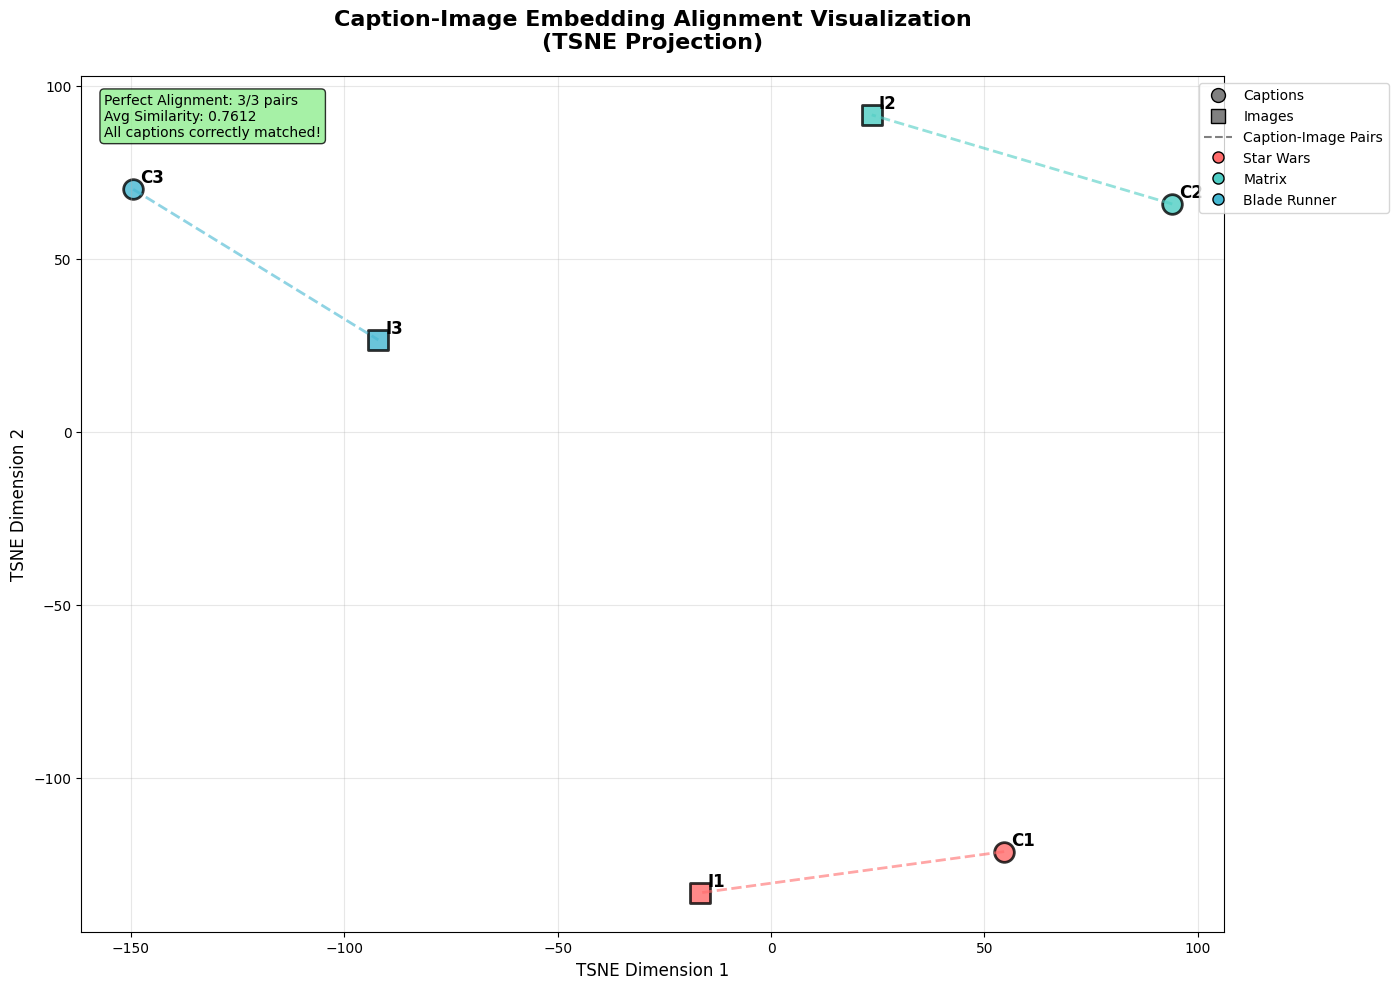


2. PCA Embedding Visualization:
Generating embeddings for visualization...


Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Applying PCA dimensionality reduction...


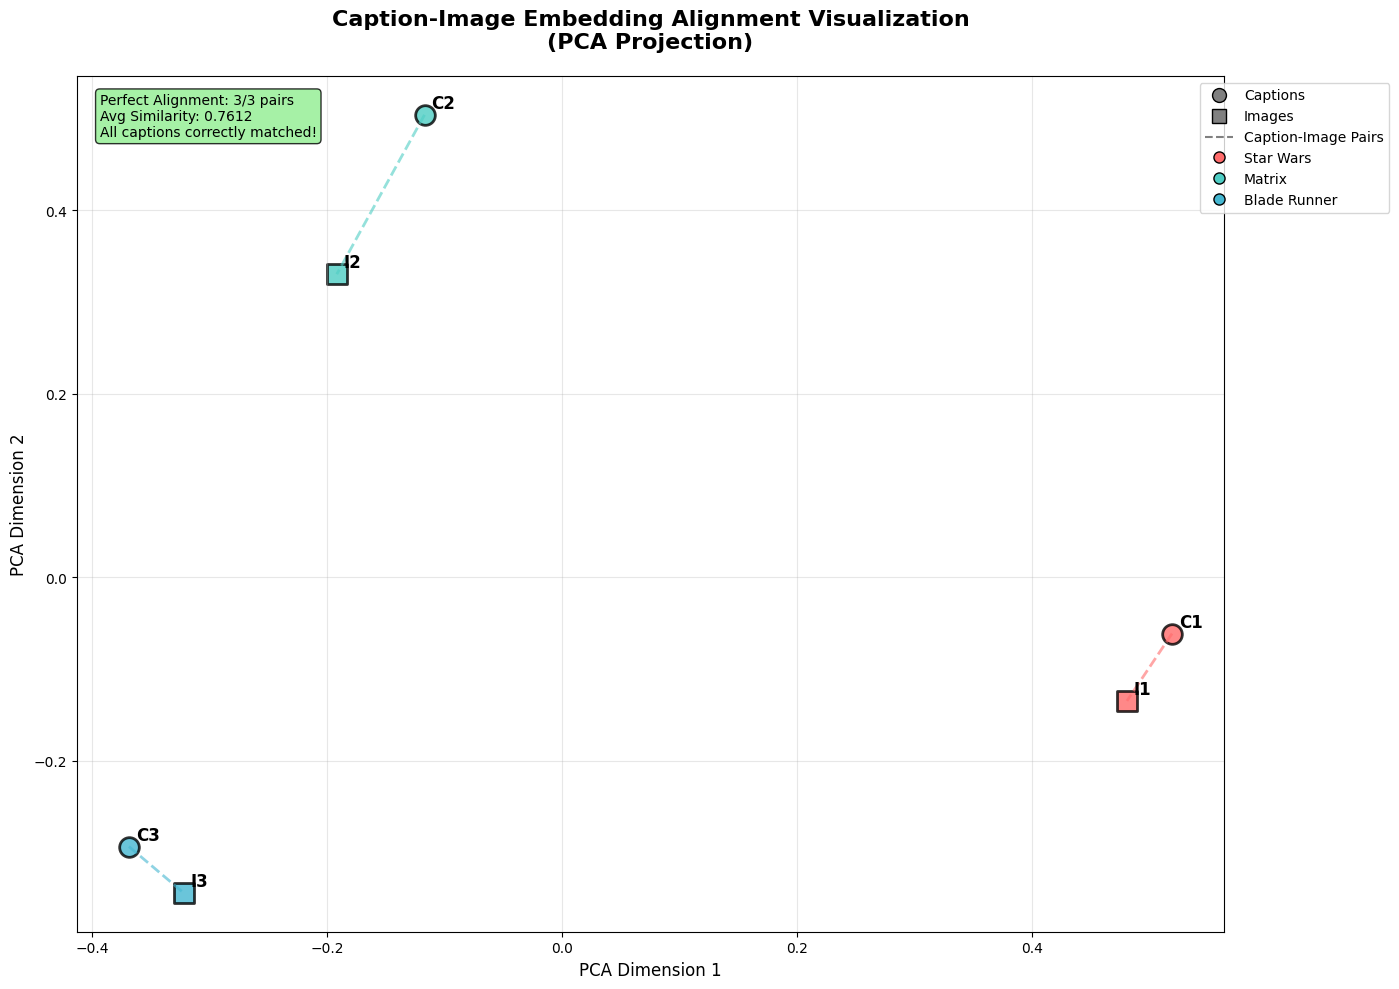


3. Similarity Heatmap:


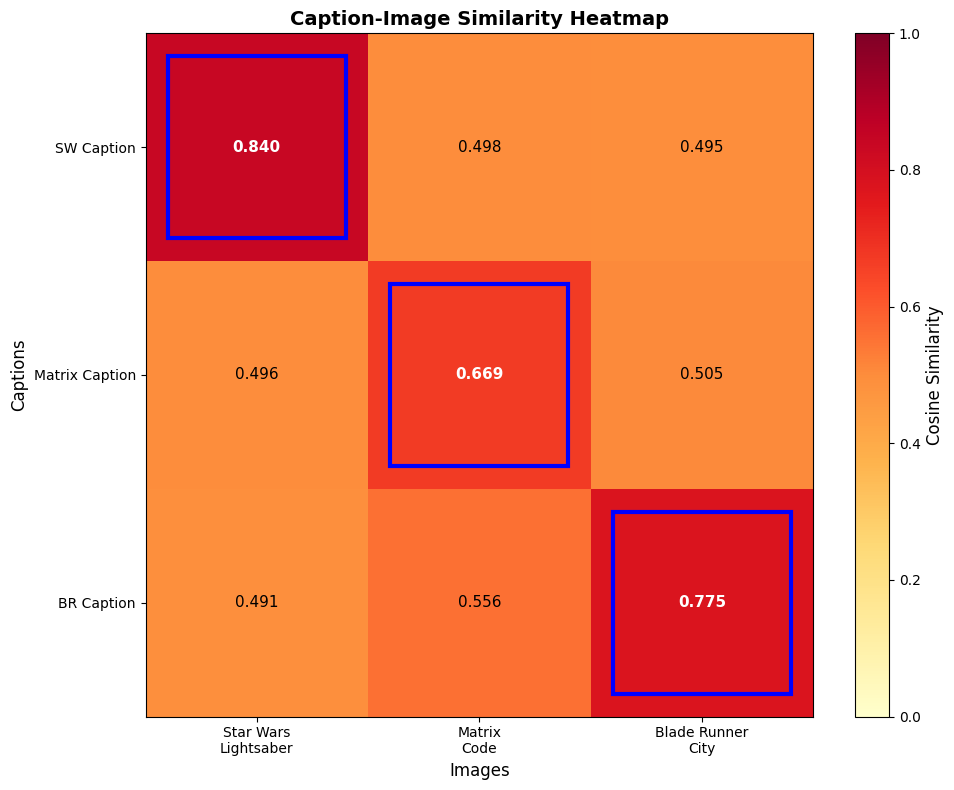


4. Distance Analysis (t-SNE space):

EMBEDDING SPACE DISTANCE ANALYSIS:

Pair 1:
  Caption: An epic duel unfolds under the stormy skies as two warriors ...
  Image: https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg
  2D Distance: 72.2113
  Caption coords: (54.600, -121.378)
  Image coords: (-16.621, -133.297)

Pair 2:
  Caption: A lone figure stands at the crossroads of code and reality, ...
  Image: https://i.ibb.co/B2bNB4Sd/matrix-code.jpg
  2D Distance: 74.9696
  Caption coords: (93.988, 65.770)
  Image coords: (23.585, 91.534)

Pair 3:
  Caption: Beneath neon-lit skyscrapers and glowing billboards, a cyber...
  Image: https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg
  2D Distance: 72.0511
  Caption coords: (-149.444, 70.018)
  Image coords: (-92.017, 26.504)

Average caption-image distance: 73.0774
Distance std deviation: 1.3396

Closest pair in 2D space: Pair 3 (distance: 72.0511)
Farthest pair in 2D space: Pair 2 (distance: 74.9696)


In [9]:
# Your captions and images from the previous results
captions = [
    "An epic duel unfolds under the stormy skies as two warriors clash with their lightsabers, igniting sparks of destiny in an intense battle.",
    "A lone figure stands at the crossroads of code and reality, embracing mystery amidst a digital rainstorm that whispers secrets to those who dare look beyond illusion.",
    "Beneath neon-lit skyscrapers and glowing billboards, a cyberpunk metropolis hums alive with energy—a vibrant tapestry where technology meets urban grit on every corner."
]

images = [
    "https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg",
    "https://i.ibb.co/B2bNB4Sd/matrix-code.jpg",
    "https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg"
]

# Create comprehensive visualizations
viz_results = complete_embedding_visualization(model, captions, images, results)

# Get Text & Image Embeddings for Retrieval

Encoding images...: 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


Similarity Scores (Text vs. Images):

Quote: May the Force be with you
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.5848
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.4444
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.4048

Quote: Que la Fuerza te acompañe
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.3303
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.2947
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.2794

Quote: フォースと共にあらんことを
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.3462
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.2665
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.2694

Quote: Que a Força esteja com você
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.3984
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.3327
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.3313

Quote: Möge die Macht mit dir sein
  Ima

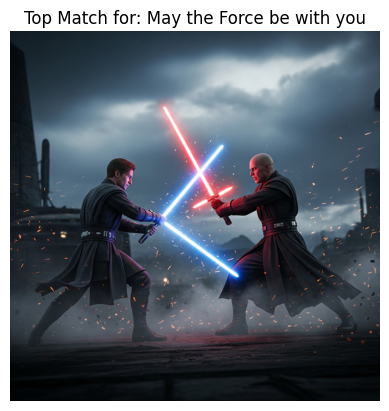

In [ ]:
import numpy as np
from transformers import AutoModel
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


# Multilingual sci-fi quotes (e.g., "May the Force be with you")
texts = [
    "May the Force be with you",  # English
    "Que la Fuerza te acompañe",  # Spanish
    "フォースと共にあらんことを",  # Japanese
    "Que a Força esteja com você",  # Portuguese
    "Möge die Macht mit dir sein",  # German
    "دع القوة تكون معك",  # Arabic
]

# Images of sci-fi movie scenes
image_urls = [
    "https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg",  # Star Wars lightsaber duel
    "https://i.ibb.co/B2bNB4Sd/matrix-code.jpg",  # Matrix code rain
    "https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg",  # Blade Runner cityscape
]

# Encode text for retrieval
text_embeddings = model.encode_text(
    texts=texts,
    task="retrieval",
    prompt_name="query",
    return_numpy=True
)

# Encode images for retrieval
image_embeddings = model.encode_image(
    images=image_urls,
    task="retrieval",
    return_numpy=True
)

# Compute cosine similarity between text and image embeddings
def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))

similarities = cosine_similarity(text_embeddings, image_embeddings)

# Display results
print("Similarity Scores (Text vs. Images):")
for i, text in enumerate(texts):
    print(f"\nQuote: {text}")
    for j, url in enumerate(image_urls):
        print(f"  Image {j+1} ({url}): {similarities[i][j]:.4f}")

# Visualize top match for first quote
top_image_idx = np.argmax(similarities[0])
response = requests.get(image_urls[top_image_idx])
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.title(f"Top Match for: {texts[0]}")
plt.axis("off")
plt.show()

# Get Text Embeddings for Text Matching

In [ ]:
!pip install scikit-learn matplotlib numpy

Encoding images...: 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


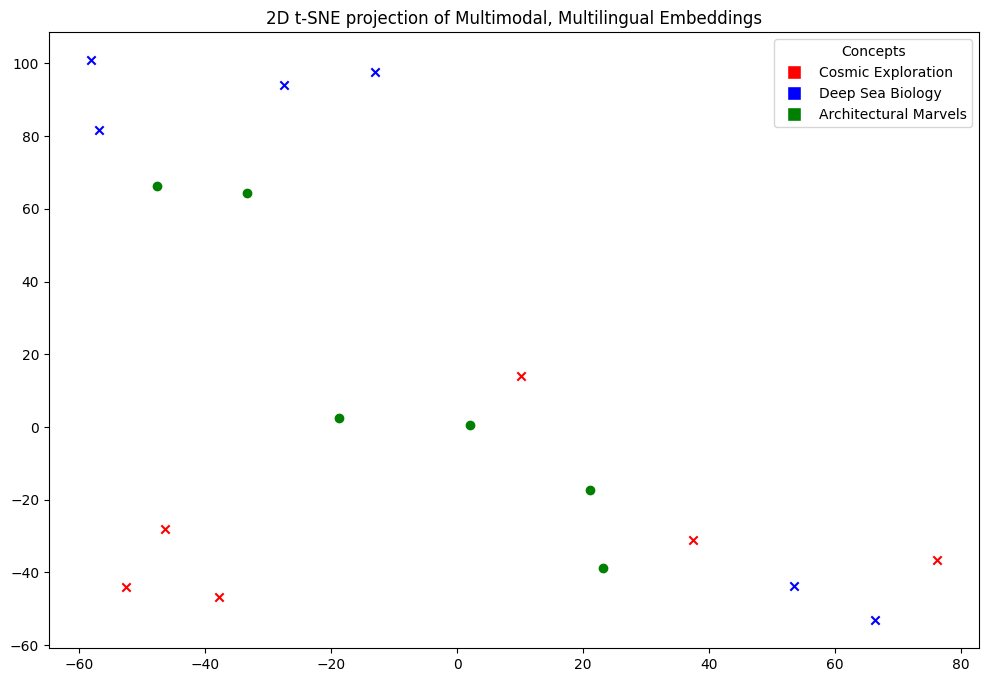

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# --- A Curated Multimodal, Multilingual Dataset ---
data = {
    "Cosmic Exploration": {
        "texts": ["Nebulae and distant galaxies", "L'exploration spatiale", "星际探索", "Viaje a las estrellas"],
        "images": ["https://i.ibb.co/B5ZNstC9/galaxy.jpg", "https://i.ibb.co/WNBkxR2v/astronaut.jpg"]
    },
    "Deep Sea Biology": {
        "texts": ["Bioluminescent creatures of the deep", "La vida en las fosas abisales", "深海生物", "Tiefseeforschung"],
        "images": ["https://i.ibb.co/LzvH2YKg/jellyfish.jpg", "https://i.ibb.co/yFxk6MrN/anglerfish.jpg"]
    },
    "Architectural Marvels": {
        "texts": ["Modernist architecture", "Готическая архитектура", "未来派の建物", "Ancient Roman structures"],
        "images": ["https://i.ibb.co/zTsKJKLH/modern-architecture.jpg", "https://i.ibb.co/Zp95cW2c/gothic-cathedral.jpg"]
    }
}

# --- Prepare for Embedding ---
all_texts = []
all_images = []
labels = []
for concept, content in data.items():
    all_texts.extend(content["texts"])
    all_images.extend(content["images"])
    labels.extend([concept] * (len(content["texts"]) + len(content["images"])))

# --- Get the Embeddings ---
text_embeddings = model.encode_text(texts=all_texts, task="retrieval", return_numpy=True)
image_embeddings = model.encode_image(images=all_images, task="retrieval", return_numpy=True)

# --- Combine and Reduce Dimensionality ---
all_embeddings = np.concatenate([text_embeddings, image_embeddings])
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings = tsne.fit_transform(all_embeddings)

# --- The "Geeky" Visualization ---
plt.figure(figsize=(12, 8))
num_texts = len(all_texts)
colors = {'Cosmic Exploration': 'r', 'Deep Sea Biology': 'b', 'Architectural Marvels': 'g'}

# Plot texts as 'x' and images as 'o'
for i, (embedding, label) in enumerate(zip(reduced_embeddings, labels)):
    marker = 'x' if i < num_texts else 'o'
    plt.scatter(embedding[0], embedding[1], c=colors[label], marker=marker, label=label if i == 0 or labels[i-1] != label else "")

# Create a legend
handles = [plt.Line2D([0], [0], marker='s', color='w', label=concept, markerfacecolor=color, markersize=10) for concept, color in colors.items()]
plt.legend(handles=handles, title="Concepts")
plt.title("2D t-SNE projection of Multimodal, Multilingual Embeddings")
plt.show()

In [ ]:
texts = [
    "غروب جميل على الشاطئ",  # Arabic
    "海滩上美丽的日落",  # Chinese
    "Un beau coucher de soleil sur la plage",  # French
    "Ein wunderschöner Sonnenuntergang am Strand",  # German
    "Ένα όμορφο ηλιοβασίλεμα πάνω από την παραλία",  # Greek
    "समुद्र तट पर एक खूबसूरत सूर्यास्त",  # Hindi
    "Un bellissimo tramonto sulla spiaggia",  # Italian
    "浜辺に沈む美しい夕日",  # Japanese
    "해변 위로 아름다운 일몰",  # Korean
]

text_embeddings = model.encode_text(texts=texts, task="text-matching")

Encoding texts...: 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]


# Get Text Embeddings for Codes Retrieval

In [ ]:
code_snippets = [
    """
def calculate_fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b
    """,
    """
import numpy as np
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    """,
    """
import json
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    """
]

# --- Multilingual "Developer" Queries ---
dev_queries = [
    "une fonction pour sauvegarder des données dans un fichier json", # French: a function to save data to a json file
    "計算フィボナッチ数列の関数", # Japanese: function to calculate the Fibonacci sequence
    "функция для вычисления средней абсолютной ошибки", # Russian: function to calculate mean absolute error
    "eine Funktion, die eine Sequenz von Fibonacci-Zahlen erzeugt" # German: a function that generates a sequence of Fibonacci numbers
]


# Here, we treat code as text, but the principle is the same.
code_embeddings = model.encode_text(texts=code_snippets, task="retrieval", return_numpy=True)
query_embeddings = model.encode_text(texts=dev_queries, task="retrieval", prompt_name="query", return_numpy=True)

# Compute cosine similarity between text and image embeddings
def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))

similarities = cosine_similarity(query_embeddings, code_embeddings)

# Display results
print("Similarity Scores (Text vs. Images):")
for i, text in enumerate(dev_queries):
    print(f"\nQuery: {text}")
    for j, cs in enumerate(code_snippets):
        print(f"  Code snippet {j+1} ({cs}): {similarities[i][j]:.4f}")

Encoding texts...: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

Similarity Scores (Text vs. Images):

Query: une fonction pour sauvegarder des données dans un fichier json
  Code snippet 1 (
def calculate_fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b
    ): 0.4432
  Code snippet 2 (
import numpy as np
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    ): 0.3936
  Code snippet 3 (
import json
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    ): 0.7830

Query: 計算フィボナッチ数列の関数
  Code snippet 1 (
def calculate_fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b
    ): 0.6437
  Code snippet 2 (
import numpy as np
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    ): 0.3757
  Code snippet 3 (
import json
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f

# Get Multivectors for Text and Images Retrieval

We're currently blocked from integrating `jina-embeddings-v4` into late interaction retrieval frameworks like [`PyLate`](https://github.com/lightonai/pylate) due to some pesky dependency conflicts. If this is a feature you're waiting for, fire up a new issue on our [Hugging Face discussions page]](https://huggingface.co/jinaai/jina-embeddings-v4/discussions/new) to let us know!

In [ ]:
texts = [
    "May the Force be with you",  # English
    "Que la Fuerza te acompañe",  # Spanish
    "フォースと共にあらんことを",  # Japanese
    "Que a Força esteja com você",  # Portuguese
    "Möge die Macht mit dir sein",  # German
    "دع القوة تكون معك",  # Arabic
]

# Images of sci-fi movie scenes
images = [
    "https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg",  # Star Wars lightsaber duel
    "https://i.ibb.co/B2bNB4Sd/matrix-code.jpg",  # Matrix code rain
    "https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg",  # Blade Runner cityscape
]


multivector_text_embeddings = model.encode_text(
    texts=texts,
    task="retrieval",
    return_multivector=True,
)

multivector_image_embeddings = model.encode_image(
    images=images,
    task="retrieval",
    return_multivector=True,
)

Encoding images...: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]
